# System response to a sine wave sollicitation both in transient & steady state

Let's suppose the next system $$H(s) = \frac{135}{s^2 + 5s +13}$$

One would like to know its time-related response to a input built as the sum of the 3 next sine waves: $$u_1(t)=3 \sin\left(\frac{4}{3} \pi t\right)$$ $$u_2(t) = 5 \sin\left(4 \pi t + \frac{\pi}{3}\right)$$ $$u_3(t) = 0.5 \sin\left(8 \pi t - \frac{\pi}{2}\right)$$

You're asked to :
- Plot the system's Bode diagram and highlight the relevant frequencies using asterisks.
- Use this Bode's diagram to plot the system's steady state response using a sample time of 50 ms. Remember the system is LTI and thus respects the superposition principle, so the global answer is the sum of the answers to each sine wave.
- Compute the total transient duration based on the location of the system poles.
- Simulate the time-related response (as well transient as steady state) using the relevant Python function (`forced_response`). Ensure the total simulation duration allows to have the whole transient as well as at least one complete period of the steady-state answer.
- In the 2 previous results, isolate one period of the fondamental wave in steady state, and superimpose the 2 curves. (FYI, method one is `frequency_response` and method 2 is `forced_response` commands).

In [37]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [38]:
s = ct.tf('s')
assert s is not None
H = 135 / (s**2 + 5*s + 13)
ct.poles(H)   # Check the pole location in order to compute the transient duration

array([-2.5+2.59807621j, -2.5-2.59807621j])

In [39]:
time_constant=-1/np.real(ct.poles(H))
transient = 5*time_constant[0]
transient

np.float64(2.0)

In [40]:
w = 4 * np.pi / 3
f = w / (2 * np.pi) # Fondamental of the sine wave
Tf = 1 / f          # Related period
Tf

1.5

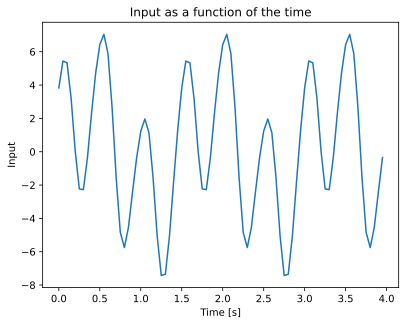

In [41]:
t=np.arange(0, 4, 0.05)   # Time vector creation, so that the transient and a bit more
                          # than one complete fondamental's period are both covered

u1 = 3 * np.sin(4/3 * np.pi * t)
u2 = 5 * np.sin(4 * np.pi * t + np.pi / 3)
u3 = 0.5 * np.sin(8 * np.pi * t - np.pi / 2)

u = u1 + u2 + u3

plt.plot(t,u)
plt.grid
plt.xlabel('Time [s]')
plt.ylabel('Input')
plt.title('Input as a function of the time')
plt.show()

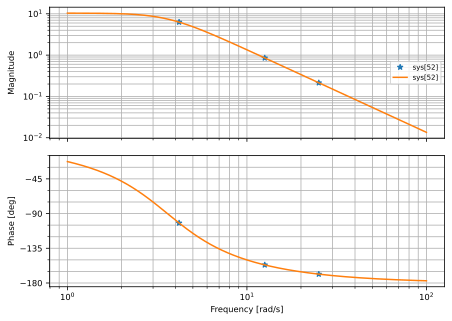

In [42]:
ct.bode(H, [4/3*np.pi, 4*np.pi, 8*np.pi], '*')
ct.bode(H)
plt.show()


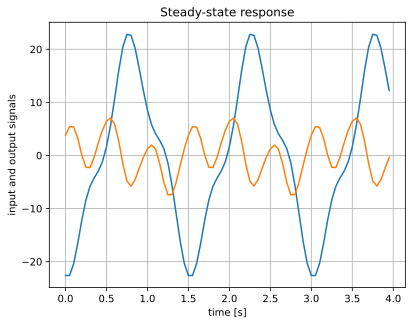

In [43]:
mag1, phase1, _ = ct.frequency_response(H, 4/3*np.pi)
mag2, phase2, _ = ct.frequency_response(H, 4*np.pi)
mag3, phase3, _ = ct.frequency_response(H, 8*np.pi)

y = mag1 * 3 * np.sin(4/3*np.pi*t+phase1) + mag2 * 5 * np.sin(4*np.pi*t+phase2+(np.pi/3)) + mag3 * 0.5 * np.sin(8*np.pi*t+phase3-(np.pi/2))

plt.plot(t, y, label="y")
plt.plot(t, u, label="u")
plt.grid()
plt.xlabel("time [s]")
plt.ylabel("input and output signals")
plt.title('Steady-state response')
plt.show()

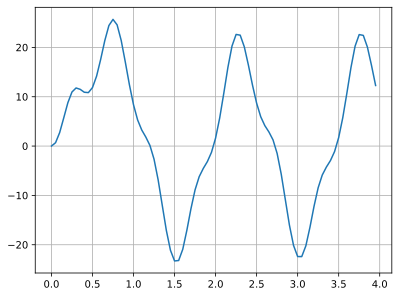

In [44]:
# Second method, using `forced_response`
_, y2=ct.forced_response(H, t, u)

plt.plot(t, y2)
plt.grid()
plt.show()

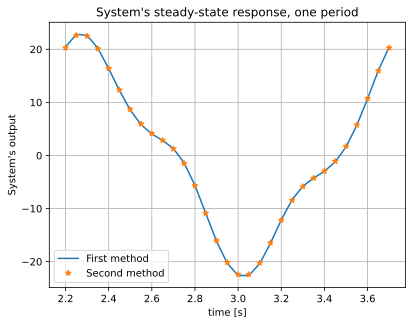

In [45]:
# Let's extract one signal period in steady-state in the 2 responses

t1 = t[(t >= 2.2) & (t <= 2.2+Tf)]  # 2 seconds (transient) + 10% to make sure it's ok.
y1 = y[(t >= 2.2) & (t <= 2.2+Tf)]
y3 = y2[(t >= 2.2) & (t <= 2.2+Tf)]

plt.plot(t1, y1, label="First method")
plt.plot(t1, y3, '*', label="Second method")
plt.grid()
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('System\'s output')
plt.title('System\'s steady-state response, one period')
plt.show()

In [46]:
sum(y1) - sum(y3) # Should be close to 0

np.float64(-0.5074711919914172)